<a href="https://colab.research.google.com/github/1adityakadam/SQL-Querying-and-Data-Visualization-in-Healthcare/blob/main/adityakadam_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
from IPython.display import display

In [ ]:
conn = sqlite3.connect('askadam.db')
c = conn.cursor()

In [ ]:
doctors_df = pd.read_csv('doctors_homework1.csv')
hospitals_df = pd.read_csv('hospitals_homework1.csv')
specialities_df = pd.read_csv('specialities.csv')

In [ ]:
doctors_df.to_sql('doctors', conn, if_exists='replace', index=False)
hospitals_df.to_sql('hospitals', conn, if_exists='replace', index=False)
specialities_df.to_sql('specialities', conn, if_exists='replace', index=False)

20

Q1. What is number of New Patients accepted by Doctors License type?

In [ ]:
c.execute('''
select
 license,
 count(new_patients) as New_Patients_Accepted
from doctors
where license in ('MD','MFT','PhD')
group by license;
''')

df = pd.DataFrame(c.fetchall(), columns=[
    "Doctor's License",
    'New Patients',
    ])
display(df)

,Doctor's License,New Patients
0,MD,11
1,MFT,4
2,PhD,5


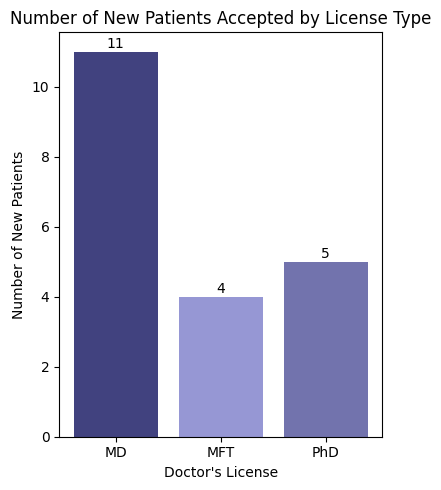

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))

plt.bar(df["Doctor's License"], df['New Patients'], color=['#41427f', '#9697d4','#7273ad'])
plt.title('Number of New Patients Accepted by License Type')
plt.xlabel("Doctor's License")
plt.ylabel('Number of New Patients')


for i, value in enumerate(df['New Patients']):
    plt.text(i, value + 0.02, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Q2. What is the count of doctors with insurance at each hospital?

In [ ]:
c.execute('''
select
 hospital_name,
 count(d.insurance) as count_ins
from hospitals
left join doctors as d
using(doctor_id)
where insurance = 'Yes'
group by hospital_name
order by count(d.insurance) desc
''')

df = pd.DataFrame(c.fetchall(), columns=[
    "Hospital Name",
    'Count of Insured Doctors',
    ])
display(df)

,Hospital Name,Count of Insured Doctors
0,Open Clinic,3
1,Blue Cross Clinic,3
2,Van Holsen Community Hospital,2
3,Imagery Health,2
4,Clear Minds Community,2
5,Holistic Health Services,1
6,Clear Water Services,1


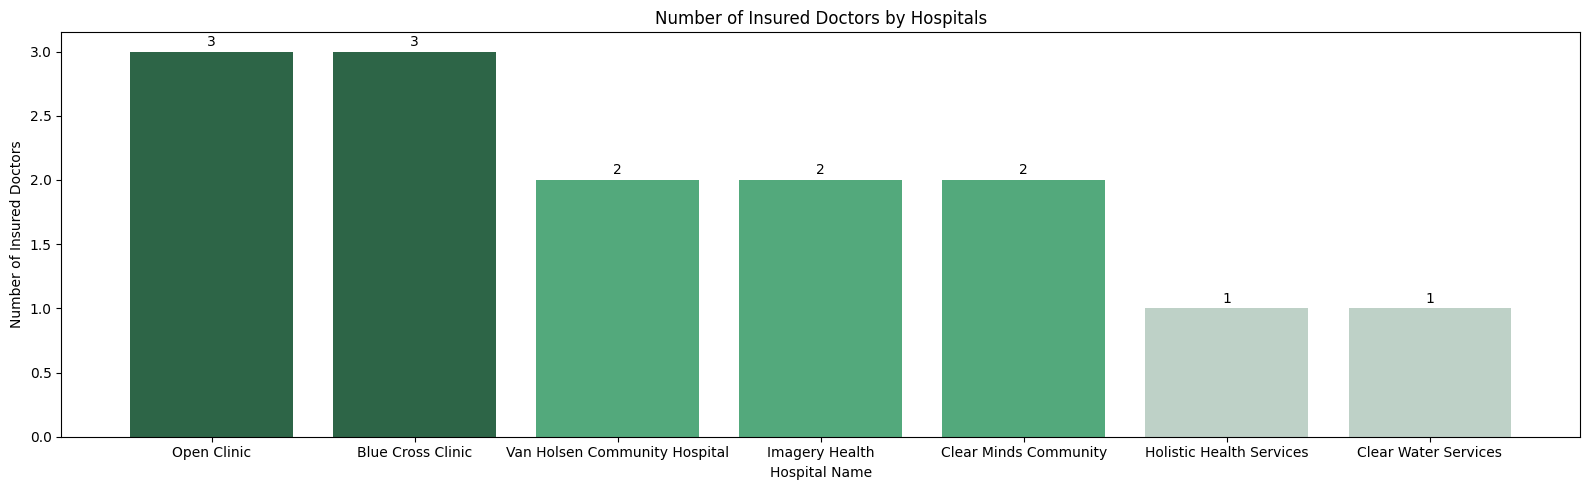

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

plt.bar(df["Hospital Name"], df['Count of Insured Doctors'], color=[
    '#2d6547',
    '#2d6547',
    '#53a97c',
    '#53a97c',
    '#53a97c',
    '#bed1c7',
    '#bed1c7'
    ])
plt.title('Number of Insured Doctors by Hospitals')
plt.xlabel("Hospital Name")
plt.ylabel('Number of Insured Doctors')


for i, value in enumerate(df['Count of Insured Doctors']):
    plt.text(i, value + 0.02, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Q3. What is the percent of male and female doctors at every hospital?

In [ ]:
c.execute('''
select
    sum(case when d.gender = 'Male' then 1 else 0 end) * 100/
    (sum(case when d.gender = 'Female' then 1 else 0 end) + sum(case when d.gender = 'Male' then 1 else 0 end))  as percent_male,
    sum(case when d.gender = 'Female' then 1 else 0 end) * 100/
    (sum(case when d.gender = 'Female' then 1 else 0 end) + sum(case when d.gender = 'Male' then 1 else 0 end)) as percent_female
from hospitals
left join doctors as d
using(doctor_id)
''')

df = pd.DataFrame(c.fetchall(), columns=[
    'Percent of Male Doctors',
    'Percent of Female Doctors'
    ])
display(df)

,Percent of Male Doctors,Percent of Female Doctors
0,35,65


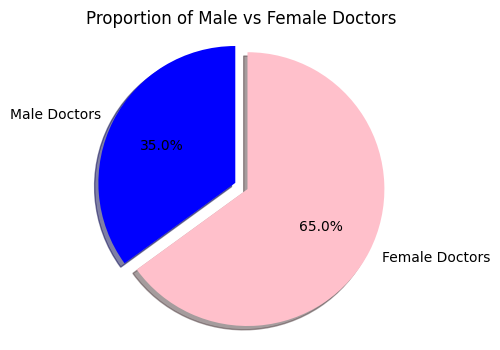

In [ ]:
import matplotlib.pyplot as plt

total_male_doctors = df['Total Male Doctors'].sum()
total_female_doctors = df['Total Female Doctors'].sum()

labels = ['Male Doctors', 'Female Doctors']
sizes = [total_male_doctors, total_female_doctors]
colors = ['blue', 'pink']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.title('Proportion of Male vs Female Doctors')

plt.show()

Q4. What is the number of doctors per city who specialize in hypertension?


In [ ]:
c.execute('''
select
    city,
    count(doctor_id) as count_doctors
from hospitals
join specialities as s
using(doctor_id)
where s.specialty_one = 'Hypertension' or s.specialty_two = 'Hypertension' or s.specialty_three = 'Hypertension'
group by city
order by count(doctor_id) desc;
''')

df = pd.DataFrame(c.fetchall(), columns=[
    'City',
    'Total Doctors'
    ])
display(df)

,City,Total Doctors
0,Sacramento,3
1,Santa Barbara,2
2,San Jose,2
3,Los Angeles,2
4,San Francisco,1
5,San Diego,1
6,Oakland,1


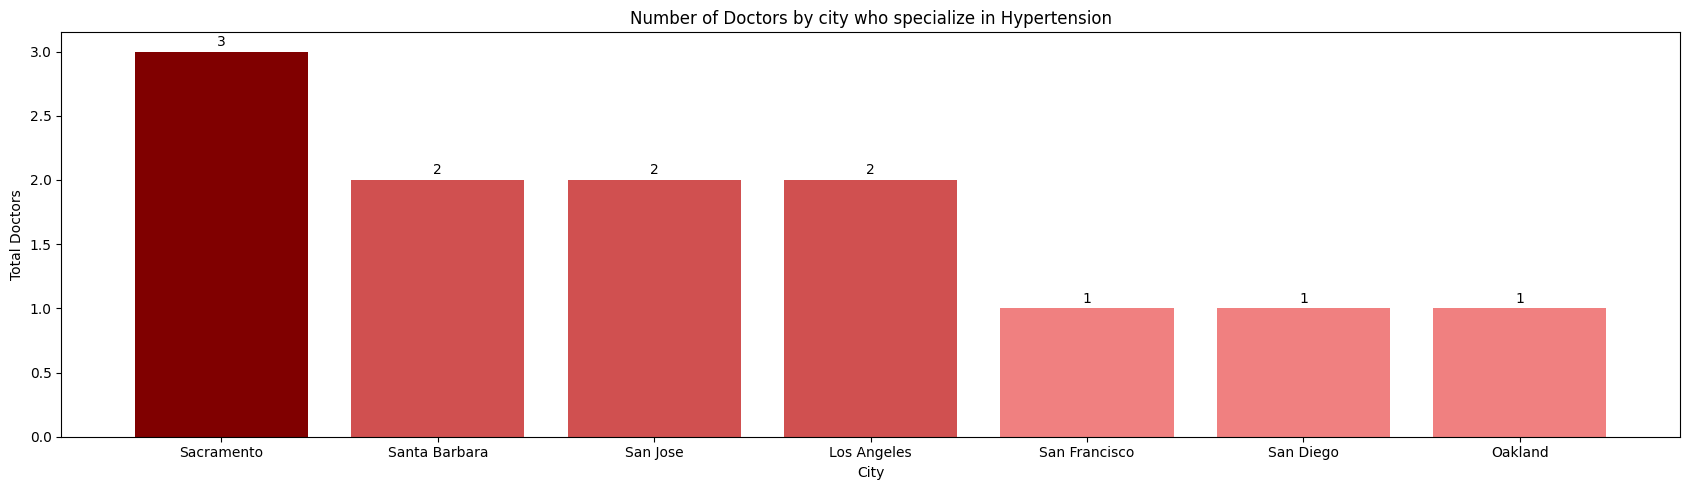

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 5))

plt.bar(df["City"], df['Total Doctors'], color=[
  '#800000',
  '#D05050',
  '#D05050',
  '#D05050',
  '#F08080',
  '#F08080',
  '#F08080',
    ])
plt.title('Number of Doctors by city who specialize in Hypertension')
plt.xlabel("City")
plt.ylabel('Total Doctors')


for i, value in enumerate(df['Total Doctors']):
    plt.text(i, value + 0.02, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Q5. What is the percentage of doctors per specialty?

In [ ]:
c.execute('''
select
    specialty,
    count(distinct doctor_id) as doctor_count
from (
    select s.specialty_one as specialty, d.doctor_id
    from doctors as d
    join specialities as s
    using(doctor_id)
    where s.specialty_one is not null

    union all

    select s.specialty_two as specialty, d.doctor_id
    from doctors as d
    join specialities as s
    using(doctor_id)
    where s.specialty_two is not null

    union all

    select s.specialty_three as specialty, d.doctor_id
    from doctors as d
    join specialities as s
    using(doctor_id)
    where s.specialty_three is not null
) as all_specialities
group by specialty
''')


df = pd.DataFrame(c.fetchall(), columns=['Specialities','Number of Doctors',])
display(df)

,Specialities,Number of Doctors
0,ADHD,4
1,Addiction,2
2,Allergy,4
3,Autism,2
4,BPD,2
5,Cholesterol,1
6,Dermatology,10
7,Diabetes,5
8,Hypertension,12
9,OCD,5


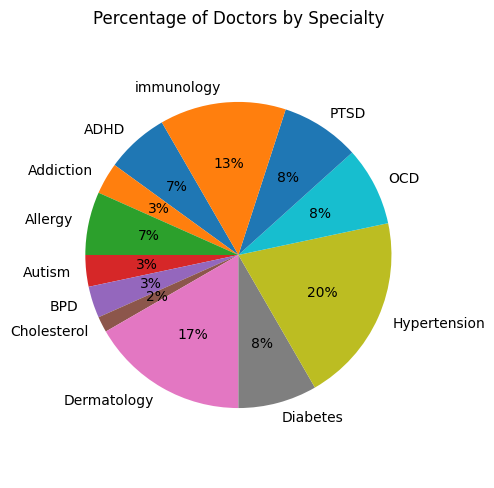

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(df['Number of Doctors'], labels=df['Specialities'], autopct='%1.0f%%', startangle=120)
plt.title('Percentage of Doctors by Specialty')
plt.axis('equal')
plt.tight_layout()

# Show the plot
plt.show()